### Linear Regression with TensorFlow (graph based)

This notebook demonstrates linear regression using plain old tensorflow working on graphs.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'1.10.1'

In [3]:
x = [22, 41, 52, 23, 41, 54, 24, 46, 56, 27, 47, 57, 28, 48, 58,  9, 
     49, 59, 30, 49, 63, 32, 50, 67, 33, 51, 71, 35, 51, 77, 40, 51, 81]
y = [131, 139, 128, 128, 171, 105, 116, 137, 145, 106, 111, 141, 114, 
     115, 153, 123, 133, 157, 117, 128, 155, 122, 183,
     176,  99, 130, 172, 121, 133, 178, 147, 144, 217]
x = np.asarray(x, np.float32)
y = np.asarray(y, np.float32)

### Numpy code for the RSS

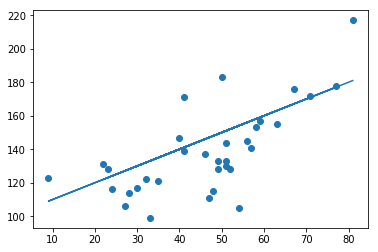

In [6]:
a = 1
b = 100
plt.scatter(x,y)
plt.plot(x,(a*x)+b);

### TASK: Calculate the RSS using numpy

How good is the fit? Calculate the sum of all quadratic differences?

$$
\hat{y} = a*x + b \\
RSS = \sum_i (\hat{y_i} - y_i)^2
$$

The result should be 13469.0

In [7]:
y_hat = a*x + b
r = (y_hat - y)
np.sum(r**2)

13469.0

### TASK: Calculate the RSS using TensorFlow

In [8]:
# Defining the graph (construction phase)
tf.reset_default_graph()
a  = tf.Variable(1.0) #We can optimize them later
b = tf.Variable(100.0)
x_ = tf.constant(x) #These are fixed, we could also use placeholders
y_ = tf.constant(y)
y_hat_ = a*x_ + b
r_ = y_ - y_hat_
rss = tf.reduce_sum(tf.square(y_ - y_hat_))
init_op = tf.global_variables_initializer() 
# Initialization ('symbolic'), this creates a new operation in the graph. Which
# initializes the graph. We call this later, when we have a concrete realization of the graph

In [9]:
with tf.Session() as sess: 
    sess.run(init_op) #Doing the initialization on the concrete realization of the graph
    rss_val = sess.run(rss)
    print(rss_val)

13469.0


In [10]:
# Let's add an optimizer to the loss 
loss = rss #This is usually called loss and we want to minimize the loss.
train_op = tf.train.GradientDescentOptimizer(learning_rate=0.00001).minimize(loss) 
init_op = tf.global_variables_initializer()
with tf.Session() as sess: 
    sess.run(init_op) #Doing the initialization on the concrete realization of the graph
    for i in range(100000):
      _,a_val, b_val, loss_val = sess.run([train_op,a,b, loss])
      if (i % 10000 == 0): #Trick not to print so often
        print(a_val, b_val, loss_val)

0.79056 99.99506 13469.0
0.9907443 93.59946 11652.306
1.0500584 90.5226 11553.3955
1.0785762 89.04327 11530.518
1.0922973 88.33149 11525.226
1.0988524 87.991455 11524.004
1.1020921 87.823395 11523.712
1.1035628 87.7471 11523.65
1.1040179 87.723495 11523.639
1.1040179 87.723495 11523.639


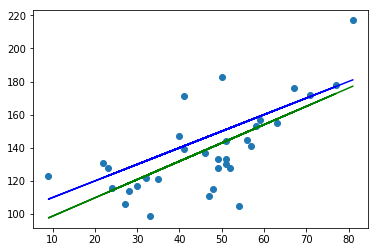

In [12]:
plt.scatter(x,y)
plt.plot(x,(1*x)+100, c='b') # Initial guess
plt.plot(x,(a_val*x)+b_val, c='g')   # After optimizing

### Task: Optimize the optimizer

* Change the learning rate to very high values and see what happens
* Change the optimizer to ```train_op = tf.train.AdamOptimizer().minimize(loss)``` and see what happens.

In [19]:
loss = rss #This is usually called loss and we want to minimize the loss.
train_op = tf.train.GradientDescentOptimizer(learning_rate=1000).minimize(loss)
train_op = tf.train.AdamOptimizer().minimize(loss)
init_op = tf.global_variables_initializer()
with tf.Session() as sess: 
    sess.run(init_op) #Doing the initialization on the concrete realization of the graph
    for i in range(10000):
      _,a_val, b_val, loss_val = sess.run([train_op,a,b, loss])
      if (i % 1000 == 0): #Trick not to print so often
        print(a_val, b_val, loss_val)

0.999 99.999 13469.0
0.8779933 99.43335 12030.176
0.892712 98.67535 11967.005
0.9093408 97.81647 11900.501
0.9265598 96.92567 11837.229
0.94391197 96.02699 11779.283
0.961121 95.13515 11727.628
0.9781326 94.25318 11682.266
0.9948875 93.38432 11643.153
1.0113126 92.53244 11610.168


## Keras code for the RSS

If you build more complex models, its usually easier to use a more high level languages than TensorFlow like e.g. keras. Here, we show you how to use keras for linear regression.

In [20]:
from tensorflow import keras

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers

Using TensorFlow backend.


In [22]:
model = Sequential()
model.add(Dense(1,input_dim=1))
model.add(Activation('linear'))

opt = optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
#keras.optimizers.TFOptimizer(optimizer)
#opt = optimizers.RMSprop(lr=0.01)

model.compile(loss='mean_squared_error',
              optimizer=opt)


In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Quite a hack to set the starting values in keras 
#(usually not needed so much in DL)
a_ini=np.array(1,dtype="float32",ndmin=2)
b_ini=np.array(100,dtype="float32",ndmin=1)
model.set_weights([a_ini,b_ini])

In [25]:
a_keras,b_keras=model.get_weights()
print("slope=",a_keras[0][0],"intercept=",b_keras[0])

slope= 1.0 intercept= 100.0


In [26]:
for i in range(0,30000):
    model.fit(x=x,y=y,batch_size=33,
                    epochs=1,
                    verbose = 0)
    a,b=model.get_weights()
    if i % 1000==0:
        RSS=np.sum(np.square(model.predict(x).reshape(len(x),)-y))
        print("Epoch:",i,"slope=",a[0][0],"intercept=",b[0],"RSS=",RSS)

Epoch: 0 slope= 0.93653333 intercept= 99.998505 RSS= 12457.342
Epoch: 1000 slope= 0.87262154 intercept= 99.72697 RSS= 12055.715
Epoch: 2000 slope= 0.877726 intercept= 99.46218 RSS= 12032.602
Epoch: 3000 slope= 0.8827264 intercept= 99.20278 RSS= 12010.451
Epoch: 4000 slope= 0.8875846 intercept= 98.95077 RSS= 11989.403
Epoch: 5000 slope= 0.89234966 intercept= 98.70359 RSS= 11969.215
Epoch: 6000 slope= 0.89702773 intercept= 98.46092 RSS= 11949.825
Epoch: 7000 slope= 0.9015869 intercept= 98.22441 RSS= 11931.345
Epoch: 8000 slope= 0.9060376 intercept= 97.99354 RSS= 11913.703
Epoch: 9000 slope= 0.9104153 intercept= 97.76646 RSS= 11896.728
Epoch: 10000 slope= 0.91468024 intercept= 97.545204 RSS= 11880.553
Epoch: 11000 slope= 0.9188454 intercept= 97.32915 RSS= 11865.105
Epoch: 12000 slope= 0.9229532 intercept= 97.116066 RSS= 11850.2
Epoch: 13000 slope= 0.92692405 intercept= 96.91007 RSS= 11836.112
Epoch: 14000 slope= 0.9308362 intercept= 96.70714 RSS= 11822.533
Epoch: 15000 slope= 0.93465996 i